<a href="https://colab.research.google.com/github/GrandDuchessPalak/Bicycle-Sharing-Demand/blob/main/BSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("day.csv")

In [ ]:
df

NameError: name 'df' is not defined

In [ ]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   casual         730 non-null    float64
 7   registered     730 non-null    float64
 8   cnt            730 non-null    float64
 9   season_spring  730 non-null    bool   
 10  season_summer  730 non-null    bool   
 11  season_winter  730 non-null    bool   
 12  mnth_aug       730 non-null    bool   
 13  mnth_dec       730 non-null    bool   
 14  mnth_feb       730 non-null    bool   
 15  mnth_jan       730 non-null    bool   
 16  mnth_jul       730 non-null    bool   
 17  mnth_jun       730 non-null    bool   
 18  mnth_mar  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


In [ ]:
df.shape

(730, 53)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.loc[(df['season']==1),'season']='spring'
df.loc[(df['season']==2),'season']='summer'
df.loc[(df['season']==3),'season']='fall'
df.loc[(df['season']==4),'season']='winter'

In [ ]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df['season'].astype('category').value_counts()

,count
season,
fall,188
summer,184
spring,180
winter,178


In [ ]:
df['yr'].astype('category').value_counts()

,count
yr,
0,365
1,365


In [ ]:
def map_mnt(x):
  return x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',
                10:'oct',11:'nov',12:'dec'})

In [ ]:
df[['mnth']]=df[['mnth']].apply(map_mnt)

In [ ]:
df['mnth'].astype('category').value_counts()

,count
mnth,
aug,62
dec,62
jul,62
jan,62
oct,62
may,62
mar,62
apr,60
nov,60


In [ ]:
def map_day(x):
  return x.map({1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat',0:'sun'})


In [ ]:
df[['weekday']]=df[['weekday']].apply(map_day)

In [ ]:
df['weekday'].astype('category').value_counts()

,count
weekday,
mon,105
sat,105
sun,105
fri,104
thu,104
tue,104
wed,103


In [ ]:
df['workingday'].astype('category').value_counts()

,count
workingday,
1,499
0,231


In [ ]:
#1: good weather
df.loc[(df['weathersit']==1),'weathersit']='A'

#2: mediocre weather
df.loc[(df['weathersit']==2),'weathersit']='B'

#3: bad weather
df.loc[(df['weathersit']==3),'weathersit']='C'

In [ ]:
df['weathersit'].astype("category").value_counts()

,count
weathersit,
A,463
B,246
C,21


<Axes: xlabel='temp', ylabel='Density'>

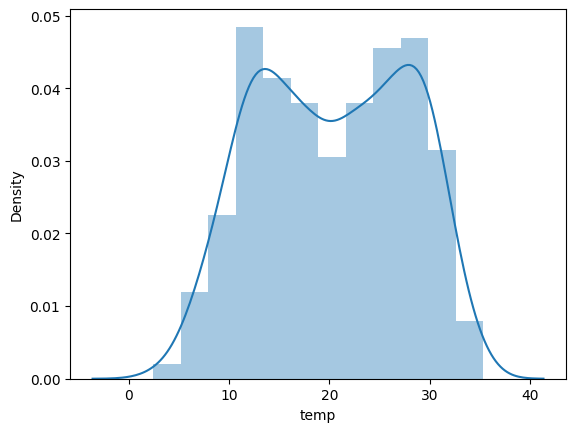

In [ ]:
sns.distplot(df['temp'])

<Axes: xlabel='atemp', ylabel='Density'>

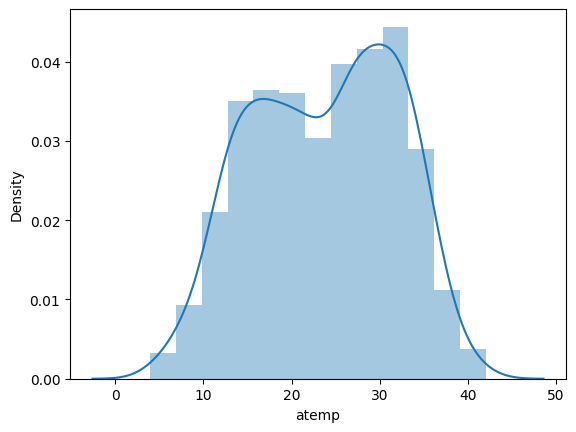

In [ ]:
sns.distplot(df['atemp'])

<Axes: xlabel='windspeed', ylabel='Density'>

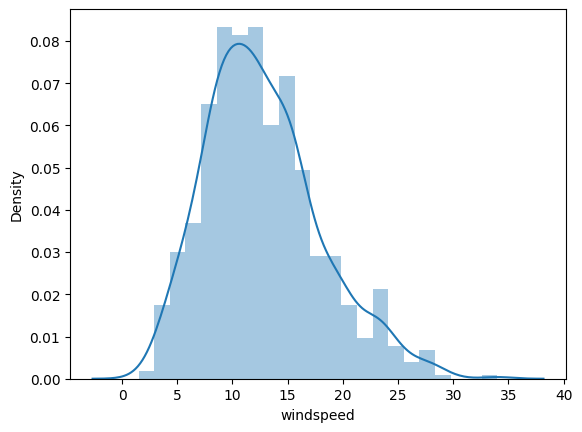

In [ ]:
sns.distplot(df['windspeed'])

<Axes: xlabel='cnt', ylabel='Density'>

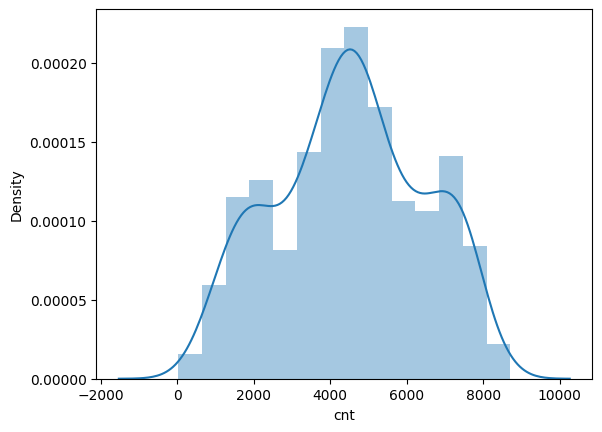

In [ ]:
sns.distplot(df['cnt'])

In [ ]:
df['dteday']=df['dteday'].astype('datetime64[ns]')

In [ ]:
df_cat=df.select_dtypes(exclude=['float','int','datetime64'])

In [ ]:
df_cat.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [ ]:
df_cat

,season,mnth,weekday,weathersit
0,spring,jan,sat,B
1,spring,jan,sun,B
2,spring,jan,mon,A
3,spring,jan,tue,A
4,spring,jan,wed,A
...,...,...,...,...
725,spring,dec,thu,B
726,spring,dec,fri,B
727,spring,dec,sat,B
728,spring,dec,sun,A


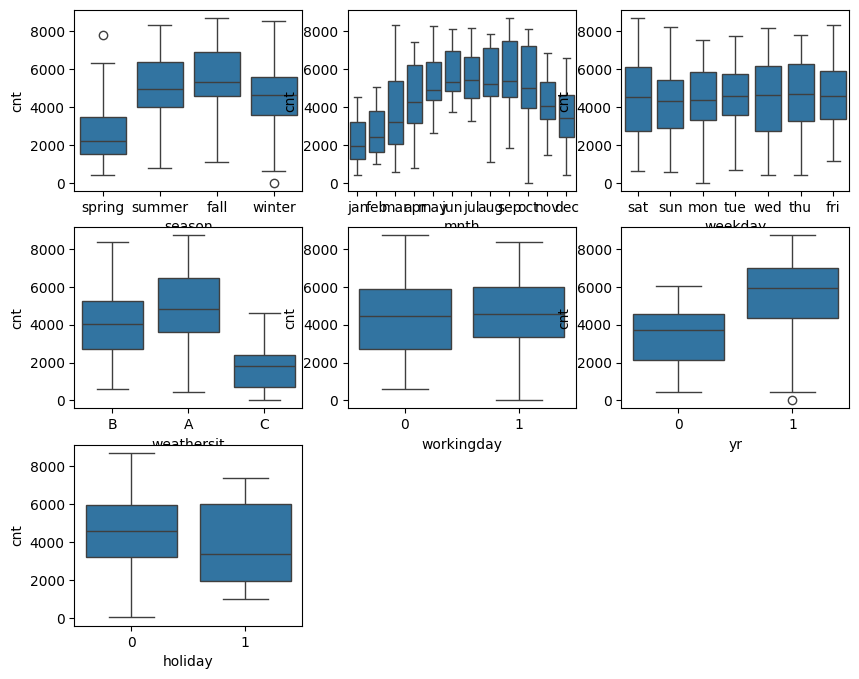

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.show()

In [ ]:
l=['casual','registered','cnt']
for i in l:
  df[i]=df[i].astype("float")

In [ ]:
df_num=df.select_dtypes("float")
df_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


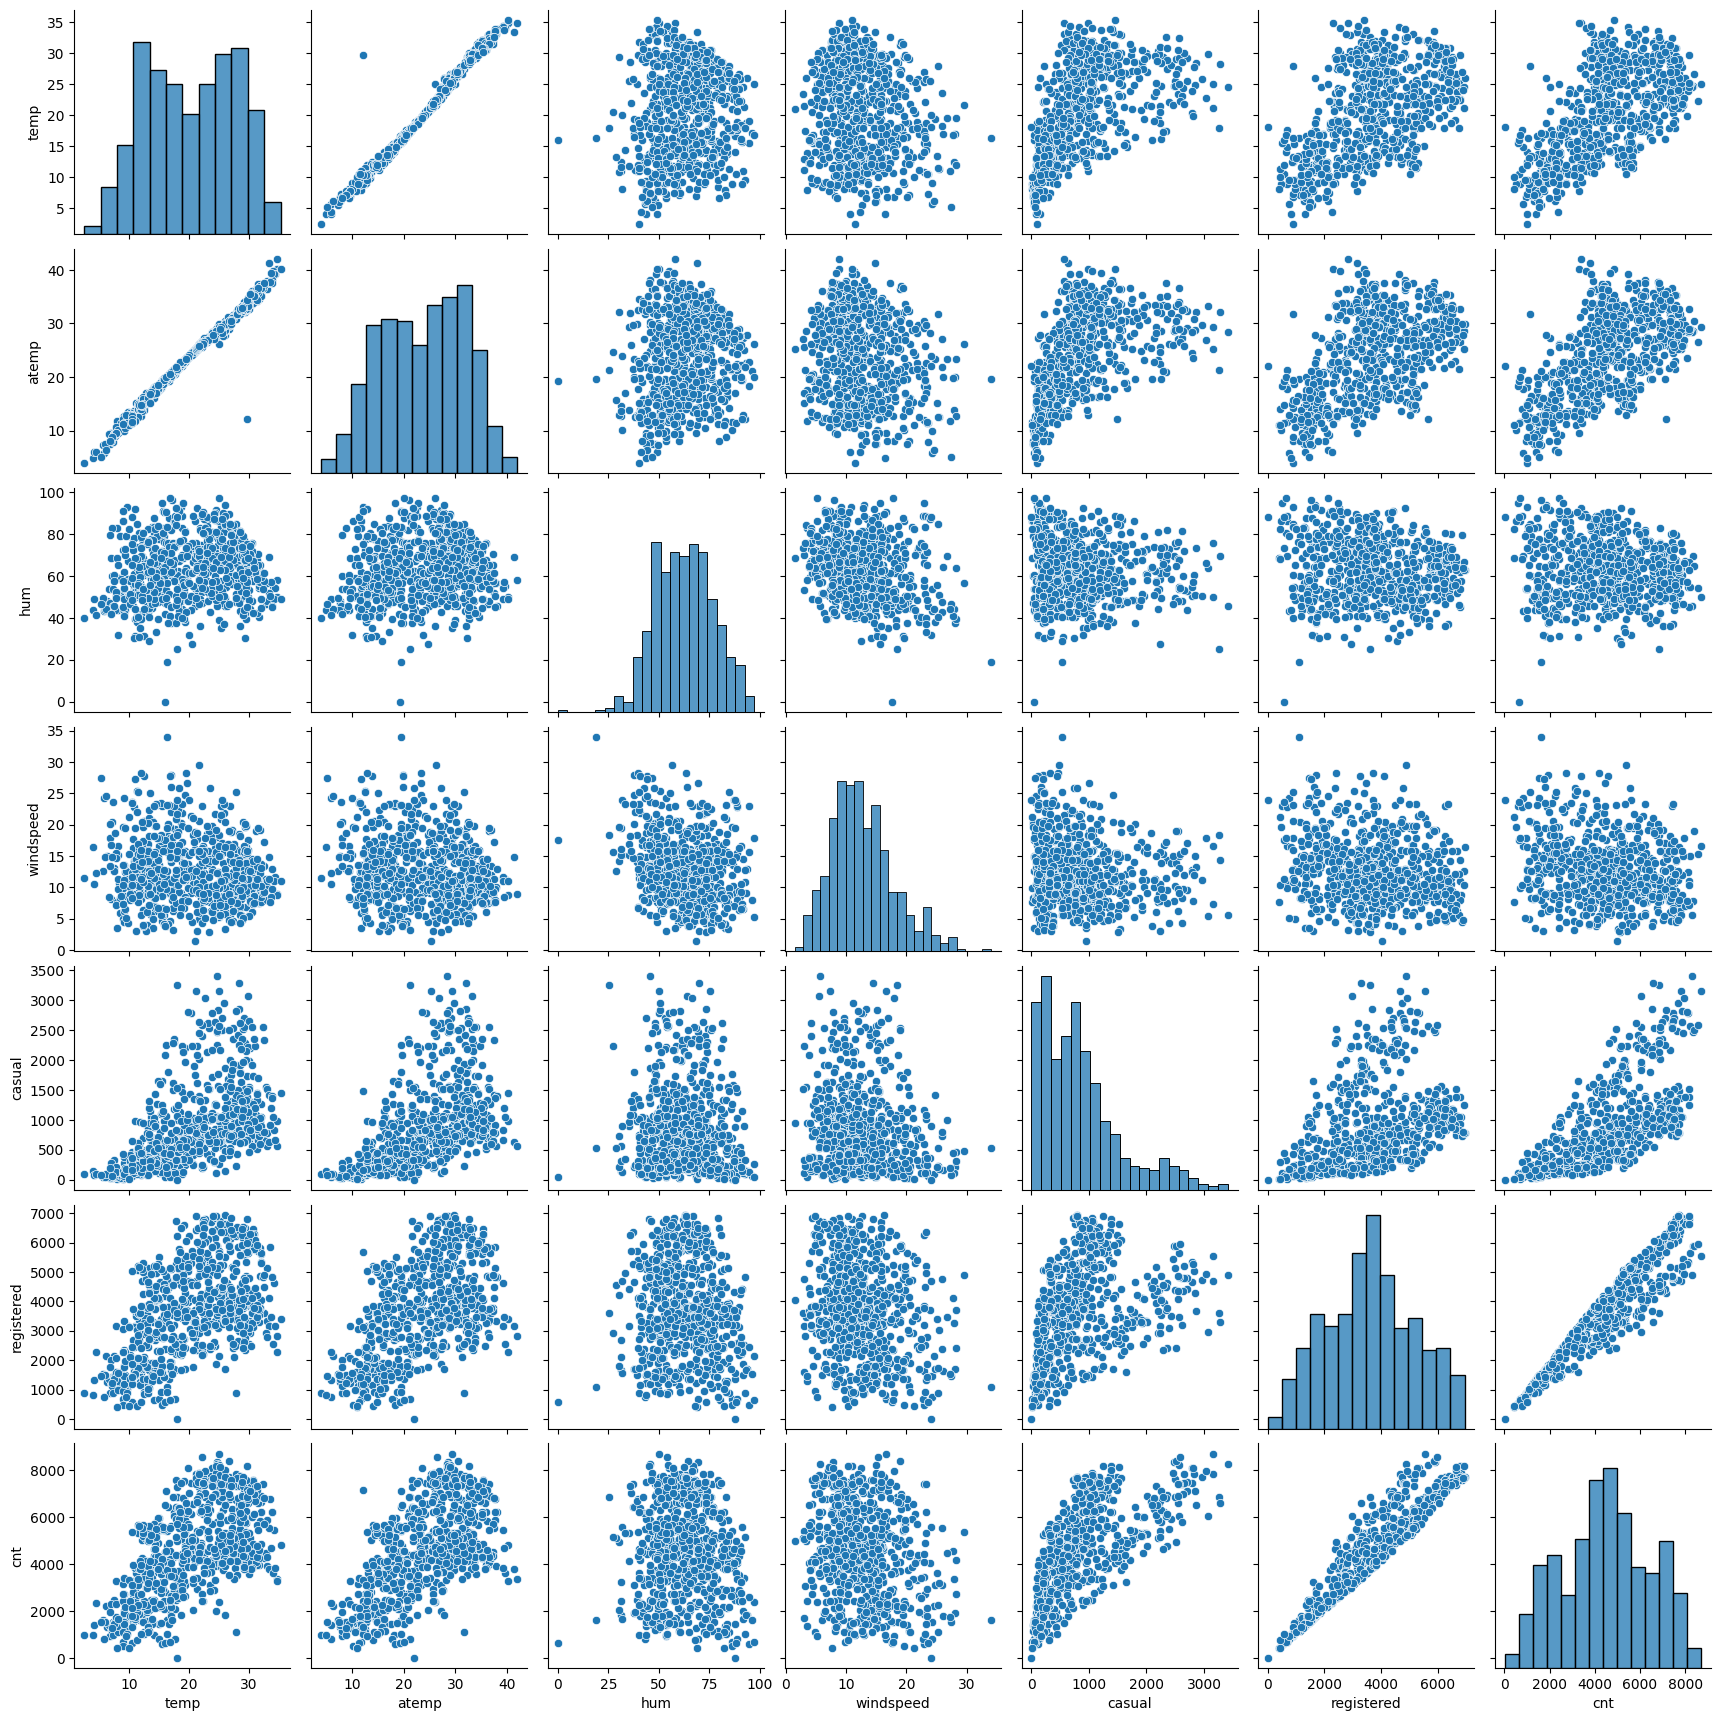

In [ ]:
sns.pairplot(df_num)
plt.show()

In [ ]:
cor=df_num.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

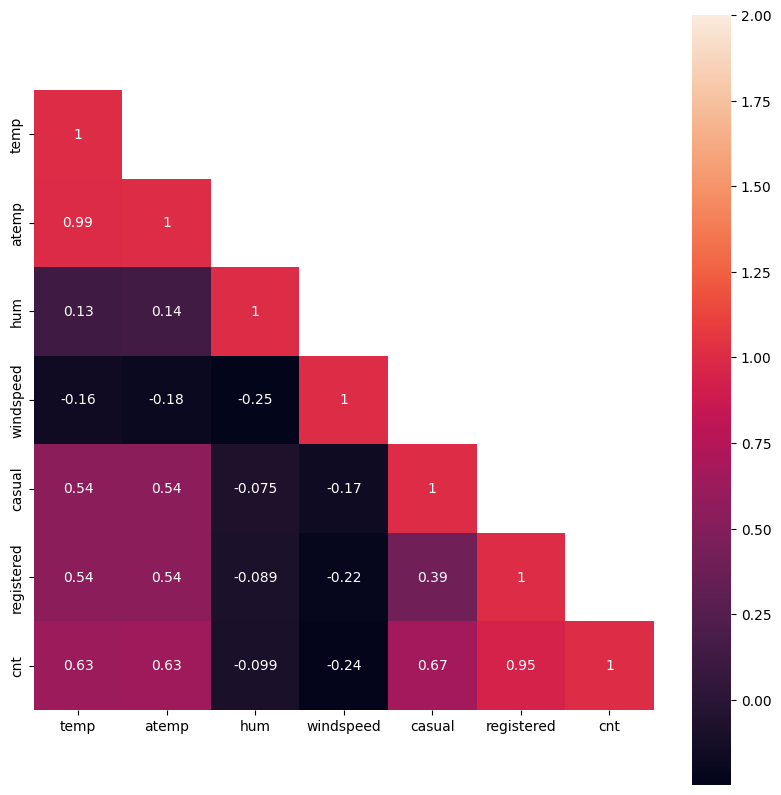

In [ ]:
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=2,square=True,annot=True)

In [ ]:
df.drop('atemp',axis=1,inplace=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,02-01-2018,spring,0,jan,0,0,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,03-01-2018,spring,0,jan,0,1,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,04-01-2018,spring,0,jan,0,2,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,05-01-2018,spring,0,jan,0,3,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,dec,0,4,1,B,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,28-12-2019,spring,1,dec,0,5,1,B,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,29-12-2019,spring,1,dec,0,6,0,B,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,30-12-2019,spring,1,dec,0,0,0,A,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,jan,0,sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,jan,0,mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,jan,0,tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,jan,0,wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


In [ ]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,season,mnth,weekday,weathersit
0,spring,jan,sat,B
1,spring,jan,sun,B
2,spring,jan,mon,A
3,spring,jan,tue,A
4,spring,jan,wed,A


In [ ]:
df_dum=pd.get_dummies(df_cat,drop_first=True)
df_dum.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df=df.drop(list(df_cat.columns),axis=1)
df

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [ ]:
df=pd.concat([df,df_dum],axis=1)
df.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,True,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,True,False,False,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,True,False,False,False,False,False,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,True,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df=df.drop(['instant','dteday'],axis=1,inplace=False)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,6,0,B,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,spring,0,jan,0,0,0,B,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,spring,0,jan,0,1,1,A,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,spring,0,jan,0,2,1,A,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,spring,0,jan,0,3,1,A,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)

In [ ]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
683,1,0,1,13.188347,62.0417,10.250129,320.0,5125.0,5445.0,False,...,False,False,False,False,False,True,False,False,True,False
645,1,1,0,15.716653,70.9583,12.708493,874.0,4604.0,5478.0,False,...,True,False,True,False,False,False,False,False,True,False
163,0,0,1,26.035000,49.4583,20.458450,863.0,4157.0,5020.0,False,...,False,False,True,False,False,False,False,False,False,False
360,0,0,1,13.325000,76.2500,12.626150,103.0,1059.0,1162.0,True,...,False,False,False,False,False,False,True,False,True,False
640,1,0,1,26.957500,79.3750,4.458569,728.0,6844.0,7572.0,False,...,True,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,15.758268,52.7391,18.130468,982.0,1435.0,2417.0,True,...,False,False,False,False,True,False,False,False,False,False
106,0,0,0,18.723347,47.9583,20.334232,1558.0,2186.0,3744.0,False,...,False,False,False,False,True,False,False,False,False,False
270,0,0,1,26.035000,84.8750,9.958143,480.0,3427.0,3907.0,False,...,False,True,False,False,False,False,False,True,True,False
435,1,0,1,19.133347,48.9167,13.916771,838.0,4460.0,5298.0,True,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale=MinMaxScaler()
var=['temp','hum','windspeed','casual','registered','cnt']
df_train[var]=scale.fit_transform(df_train[var])

In [ ]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.654174,0.414873,0.261980,0.502044
std,0.500067,0.163398,0.470935,0.227231,0.143648,0.185619,0.207434,0.240949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.544598,0.281934,0.100987,0.338744
50%,1.000000,0.000000,1.000000,0.575304,0.659940,0.384732,0.224792,0.507351
75%,1.000000,0.000000,1.000000,0.745079,0.756977,0.526481,0.334721,0.671975
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


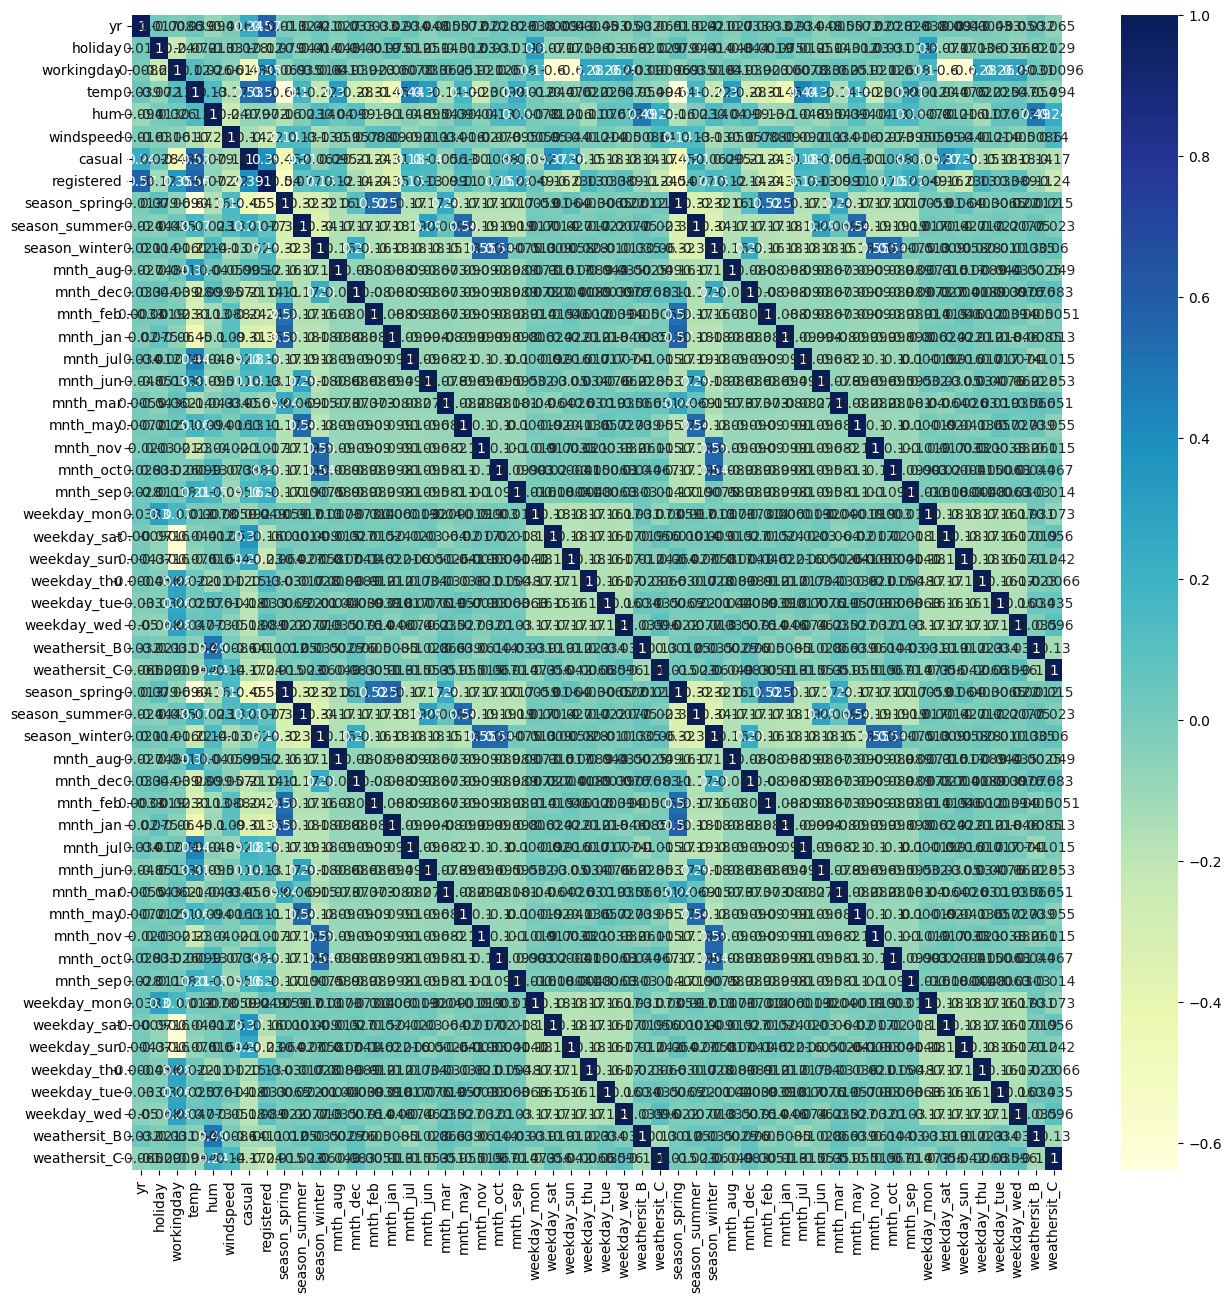

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
x_train=df_train.drop(['casual','registered'],axis=1)
y_train = df_train.pop('cnt')


In [ ]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_B', 'weathersit_C',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [ ]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
683,1,0,1,0.327133,0.639330,0.327101,0.605336,False,False,True,...,False,False,False,False,False,True,False,False,True,False
645,1,1,0,0.403972,0.731215,0.419004,0.609320,False,False,True,...,True,False,True,False,False,False,False,False,True,False
163,0,0,1,0.717562,0.509660,0.708724,0.554026,False,True,False,...,False,False,True,False,False,False,False,False,False,False
360,0,0,1,0.331287,0.785745,0.415925,0.088253,True,False,False,...,False,False,False,False,False,False,True,False,True,False
640,1,0,1,0.745598,0.817947,0.110593,0.862127,False,False,True,...,True,False,False,False,False,False,False,True,True,False


In [ ]:
np.array(x_train)

array([['winter', 1, 'nov', ..., 62.0417, 10.250129, 5445.0],
       ['winter', 1, 'oct', ..., 70.9583, 12.708493, 5478.0],
       ['summer', 0, 'jun', ..., 49.4583, 20.45845, 5020.0],
       ...,
       ['winter', 0, 'sep', ..., 84.875, 9.958143, 3907.0],
       ['spring', 1, 'mar', ..., 48.9167, 13.916771, 5298.0],
       ['summer', 0, 'apr', ..., 81.9167, 16.791339, 2162.0]],
      dtype=object)

In [ ]:

x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)


In [ ]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()

In [ ]:
lr.params

,0
const,-3.375078e-12
season,-1.487063e-16
yr,1.598721e-14
mnth,4.366976e-20
holiday,3.472778e-13
weekday,-8.881784e-16
workingday,2.557954e-13
weathersit,4.008481e-20
temp,-1.580958e-13
atemp,2.664535e-15


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.100e+31
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        17:36:20   Log-Likelihood:                 12808.
No. Observations:                 511   AIC:                        -2.560e+04
Df Residuals:                     501   BIC:                        -2.555e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.375e-12   1.15e-12     -2.941      0.003   -5.63e-12   -1.12e-12
season     -1.487e-16    6.3e-25  -2.36e+08      0.000   -1.49e-16   -1.49e-16
yr          1.599e-14   3.95e-13      0.040      0.968    -7.6e-13    7.92e-13
mnth        4.367e-20   4.42e-27   9.89e+06      0.000    4.37e-20    4.37e-20
holiday     3.473e-13   9.01e-13      0.385      0.700   -1.42e-12    2.12e-12
weekday    -8.882e-16   7.05e-14     -0.013      0.990   -1.39e-13    1.38e-13
workingday  2.558e-13   3.11e-13      0.823      0.411   -3.55e-13    8.67e-13
weathersit  4.008e-20   1.01e-28   3.99e+08      0.000    4.01e-20    4.01e-20
temp       -1.581e-13   2.41e-13     -0.655      0.513   -6.33e-13    3.16e-13
atemp       2.665e-15   2.26e-13      0.012      0.991   -4.42e-13    4.48e-13
hum        -1.876e-14    1.1e-14     -1.706      0.089   -4.04e-14    2.85e-15
windspeed    5.64e-14   3.19e-14      1.767      0.078    -6.3e-15    1.19e-13
cnt            1.0000    1.4e-16   7.17e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                        7.874   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.017
Skew:                          -0.159   Prob(JB):                       0.0494
Kurtosis:                       2.574   Cond. No.                     4.34e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.64e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
import statsmodels.api as sm

In [ ]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[ 4.43176531e-17  2.22044605e-16  8.42157748e-16  2.17985744e-16
 -5.28335183e-16 -1.13004996e-15  1.00000000e+00 -9.66704063e-16
 -7.24222446e-16 -2.94983153e-15 -1.15483074e-15  8.64299975e-16
 -4.47154149e-16 -4.92753873e-16 -1.06180432e-15 -5.02047380e-16
 -6.86636490e-16 -2.85521306e-16  1.73255193e-15  1.65306538e-15
 -4.62991049e-16 -3.85842742e-16  1.82781893e-17  2.06142501e-16
 -4.45306835e-16 -4.78865016e-16 -2.85135782e-16 -7.04453914e-16
 -2.06647551e-16 -1.00833743e-15 -1.16831166e-15 -2.39472002e-15
 -1.31442530e-15  8.15727718e-16 -3.36131846e-16 -5.41326131e-16
 -1.29772671e-15 -4.60414017e-16 -7.00514278e-16 -2.68174071e-16
  1.76724640e-15  1.58367645e-15 -2.40946444e-16 -4.13598317e-16
 -1.11826071e-16  1.99203607e-16 -3.55751736e-16 -4.92742804e-16
 -3.40646934e-16  1.17961196e-15  4.30211422e-16]
3.2751579226442118e-15


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lm=LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)
# rfe1=RFE(lm,15)
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
col=x_train.columns[rfe1.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'windspeed', 'cnt'], dtype='object')

In [ ]:
x_train_rfe1=x_train[col]
x_train_rfe1=sm.add_constant(x_train_rfe1)
lm1=sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.036e+32
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        17:39:41   Log-Likelihood:                 13110.
No. Observations:                 511   AIC:                        -2.621e+04
Df Residuals:                     504   BIC:                        -2.618e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.551e-12   4.56e-13      9.989      0.000    3.66e-12    5.45e-12
yr         -1.363e-12   2.15e-13     -6.337      0.000   -1.79e-12   -9.41e-13
holiday     3.105e-12   4.81e-13      6.456      0.000    2.16e-12    4.05e-12
temp        9.953e-13   1.33e-13      7.496      0.000    7.34e-13    1.26e-12
atemp      -8.855e-13   1.24e-13     -7.134      0.000   -1.13e-12   -6.42e-13
windspeed   -8.91e-14    1.7e-14     -5.229      0.000   -1.23e-13   -5.56e-14
cnt            1.0000   7.32e-17   1.37e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       39.335   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.513
Skew:                          -0.570   Prob(JB):                     3.25e-13
Kurtosis:                       4.185   Cond. No.                     3.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
a=x_train_rfe1.drop('const',axis=1)

In [ ]:
a=x_train

In [ ]:
vif=pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif


,features,VIF
8,atemp,1392.90
7,temp,1184.41
11,cnt,23.14
9,hum,14.91
10,windspeed,5.27
1,yr,4.09
5,workingday,3.18
4,weekday,3.12
3,holiday,1.09
0,season,NaN


In [ ]:
lm=LinearRegression()
rfe2=RFE(estimator=lm, n_features_to_select=7)
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[False  True False  True False False False  True  True  True  True  True]
[6 1 4 1 2 3 5 1 1 1 1 1]


In [ ]:
col2=x_train.columns[rfe2.support_]
x_train_rfe2=x_train[col2]
x_train_rfe2=sm.add_constant(x_train_rfe2)
lm2=sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.043e+32
Date:                Mon, 05 May 2025   Prob (F-statistic):               0.00
Time:                        17:44:36   Log-Likelihood:                 13152.
No. Observations:                 511   AIC:                        -2.629e+04
Df Residuals:                     503   BIC:                        -2.625e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.19e-13   5.66e-13      0.210      0.834   -9.93e-13    1.23e-12
yr          6.875e-13      2e-13      3.436      0.001    2.94e-13    1.08e-12
holiday     1.648e-12   4.44e-13      3.711      0.000    7.76e-13    2.52e-12
temp       -6.293e-13   1.23e-13     -5.122      0.000   -8.71e-13   -3.88e-13
atemp       6.251e-13   1.15e-13      5.428      0.000    3.99e-13    8.51e-13
hum        -2.359e-14    5.6e-15     -4.215      0.000   -3.46e-14   -1.26e-14
windspeed   6.573e-14   1.62e-14      4.049      0.000    3.38e-14    9.76e-14
cnt            1.0000   7.04e-17   1.42e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.612   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.406
Skew:                          -0.107   Prob(JB):                        0.495
Kurtosis:                       3.143   Cond. No.                     3.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
b=x_train_rfe2.drop('const',axis=1)
vif1=pd.DataFrame()
vif1['features']=b.columns
vif1['VIF']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by='VIF',ascending=False)
vif1

,features,VIF
3,atemp,1378.88
2,temp,1171.94
6,cnt,22.36
4,hum,14.21
5,windspeed,5.06
0,yr,4.05
1,holiday,1.04


<Axes: ylabel='Density'>

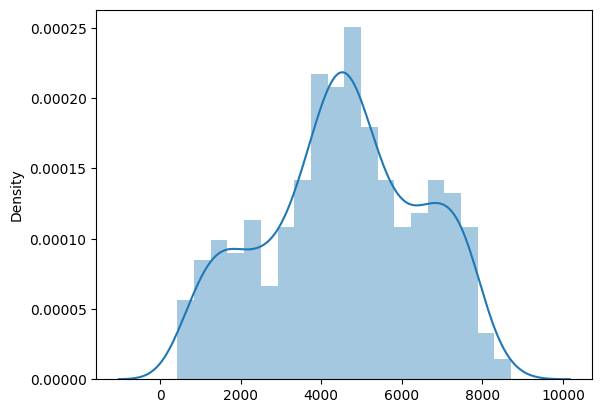

In [ ]:
y_train_cnt=lm2.predict(x_train_rfe2)
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [ ]:
scale=MinMaxScaler()

df_test[var] = scale.fit_transform(df_test[var])

In [ ]:
x_test=df_test.drop(['casual','registered'],axis=1)
y_test=df_test.pop('cnt')

In [ ]:
x_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
468,summer,1,apr,0,6,0,A,0.536626,24.39980,0.401487,0.313071,0.871675
148,summer,0,may,0,0,0,A,0.769438,30.77750,0.804036,0.363028,0.558537
302,winter,0,oct,0,0,0,A,0.299316,16.06645,0.555496,0.282038,0.387789
355,spring,0,dec,0,4,1,B,0.439902,21.30605,0.725969,0.001356,0.356967
515,summer,1,may,0,4,1,A,0.786308,31.56645,0.388742,0.322536,0.857377


In [ ]:
c=x_train_rfe2.drop('const',axis=1)
col2=c.columns

In [ ]:
x_test_rfe2=x_test[col2]

In [ ]:
x_test_rfe2=sm.add_constant(x_test_rfe2)

In [ ]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 468 to 314
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      219 non-null    float64
 1   yr         219 non-null    int64  
 2   holiday    219 non-null    int64  
 3   temp       219 non-null    float64
 4   atemp      219 non-null    float64
 5   hum        219 non-null    float64
 6   windspeed  219 non-null    float64
 7   cnt        219 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 15.4 KB


In [ ]:
y_pred=lm2.predict(x_test_rfe2)

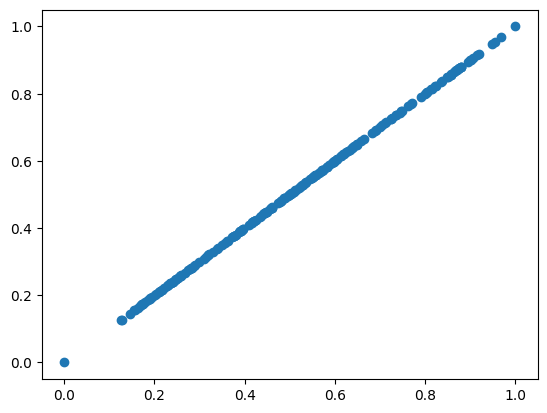

In [ ]:
plt.figure()
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

1.0

<Axes: >

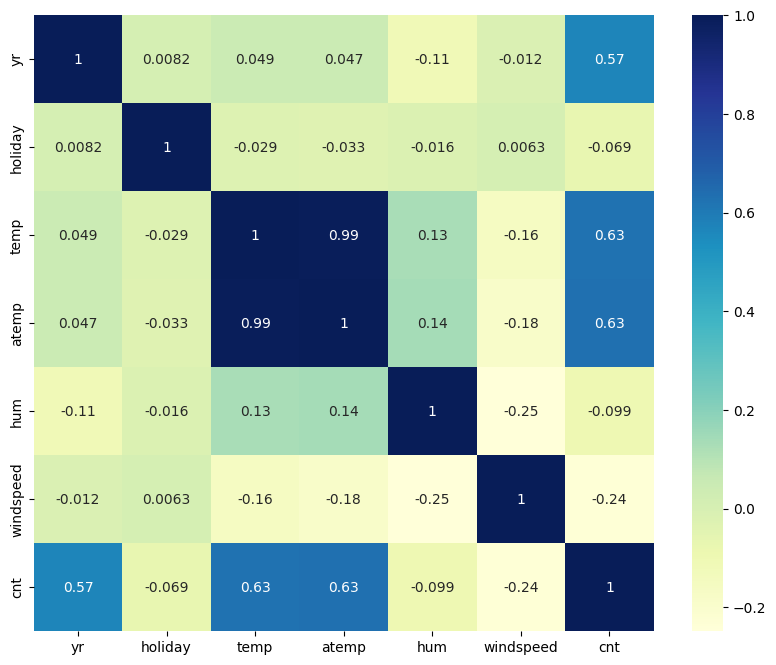

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[col2].corr(),cmap='YlGnBu',annot=True)